In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
import math
from library import graphs
from library import regulations
plt.style.use('seaborn-darkgrid')
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
palette = plt.get_cmap('Set1')


In [2]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/descriptive/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",")
data = data[data.year == 'yr1415']

/Users/kylieleblancKylie/anaconda/envs/spacy/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
geo_order = {'Urban': 4, 'Suburban': 3, 'Town': 2, 'Rural': 1}
schedules = ['reg25_0811', 'reg25_081', 'reg25_0812', 'reg25_082']
class_size = ['reg25_112', 'reg25_113', 'reg25_111']
certification = ['reg21_003', 'reg21_053', 'reg21_057']
contracts = ['reg21_102', 'reg21_401', 'reg21_352', 'reg21_354']
behavior = ['reg25_092', 'reg37_0012', 'reg25_036']

# Schedules

/Users/kylieleblancKylie/domino/dofis/code/analysis/library/graphs.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  bar_df = data.groupby([group_var])[x_var].agg({'reg_mean': 'mean', 'reg_std':'std', 'reg_count': 'count'})


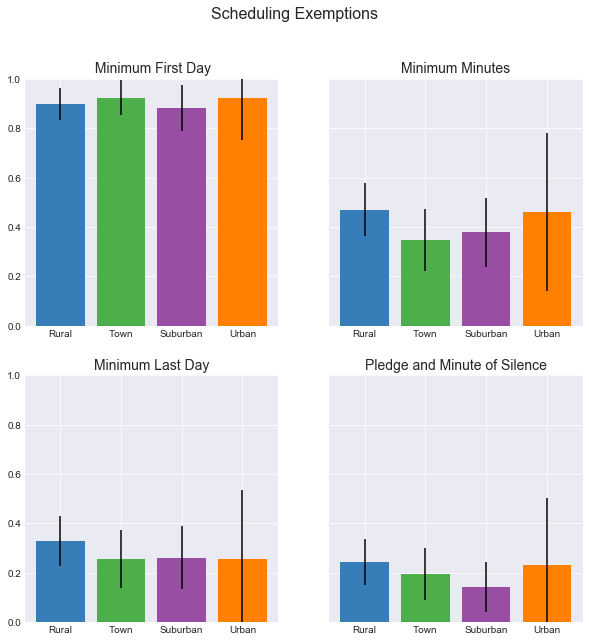

In [22]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', figsize = (10, 10))
#gs1 = gridspec.GridSpec(2, 2)
for ax, reg in zip([ax1, ax2, ax3, ax4], range(0, 4)):
    bar_df = graphs.create_bar_df(data = data, group_var = 'geography', x_var = schedules[reg], group_order_dict = geo_order)
    ax.bar(bar_df['geography'], bar_df['reg_mean'], yerr= bar_df['se'] * 1.98 * 2 ,color=palette(bar_df['order']))
    ax.set_ylim(0,1)
    ax.set_title(regulations.labels_short[schedules[reg]], fontsize = 14)
f.suptitle('Scheduling Exemptions', fontsize=16)

f.savefig(table_path + 'Geography X Scheduling', dpi = 600)
plt.show()


# Class Size

/Users/kylieleblancKylie/domino/dofis/code/analysis/library/graphs.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  bar_df = data.groupby([group_var])[x_var].agg({'reg_mean': 'mean', 'reg_std':'std', 'reg_count': 'count'})


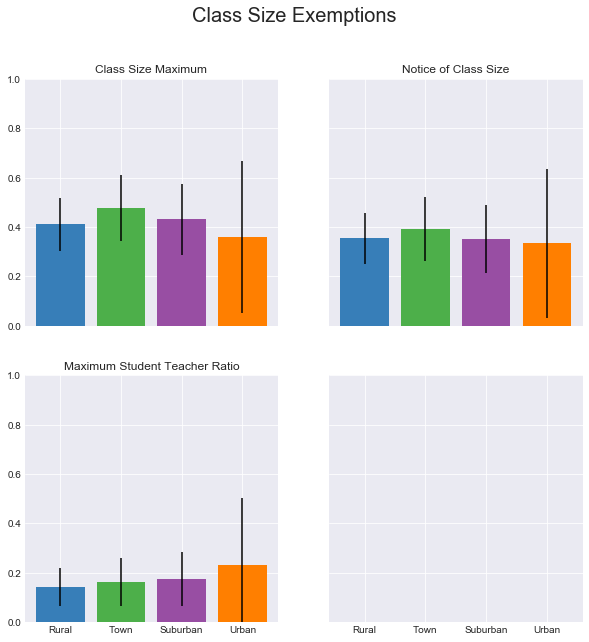

In [5]:

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', sharex = 'col', figsize = (10,10))
for ax, reg in zip([ax1, ax2, ax3], range(0, 3)):
    bar_df = graphs.create_bar_df(data = data, group_var = 'geography', x_var = class_size[reg], group_order_dict = geo_order)
    ax.bar(bar_df['geography'], bar_df['reg_mean'], yerr= bar_df['se'] * 1.98 * 2 ,color=palette(bar_df['order']))
    ax.set_ylim(0,1)
    ax.set_title(regulations.labels_short[class_size[reg]])
    ax.set_aspect('auto')
f.suptitle('Class Size Exemptions', fontsize=20)

f.savefig(table_path + 'Geography X Class Sizes', dpi = 600)

#from IPython.display import Image
#Image(table_path + 'Geography X Class Sizes.png')

# Certification

/Users/kylieleblancKylie/domino/dofis/code/analysis/library/graphs.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  bar_df = data.groupby([group_var])[x_var].agg({'reg_mean': 'mean', 'reg_std':'std', 'reg_count': 'count'})


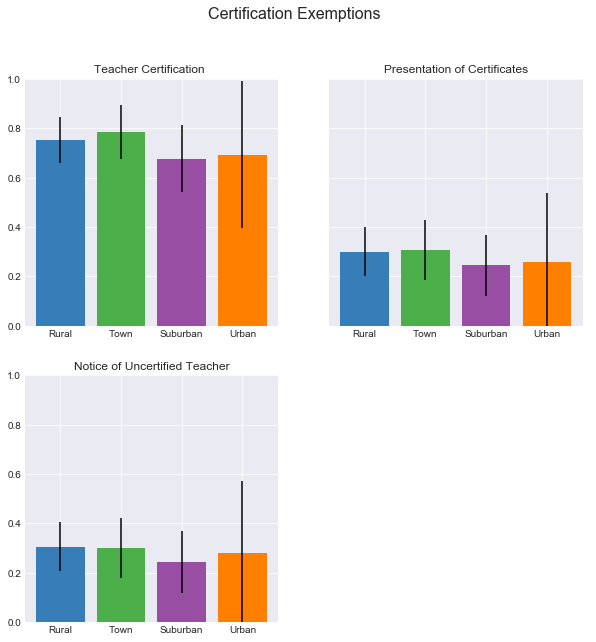

In [18]:

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey='row', figsize = (10,10))
for ax, reg in zip([ax1, ax2, ax3], range(0, 3)):
    bar_df = graphs.create_bar_df(data = data, group_var = 'geography', x_var = certification[reg], group_order_dict = geo_order)
    ax.bar(bar_df['geography'], bar_df['reg_mean'], yerr= bar_df['se'] * 1.98 * 2 ,color=palette(bar_df['order']))
    ax.set_ylim(0,1)
    ax.set_title(regulations.labels_short[certification[reg]])
    ax.set_aspect('auto')
ax4.axis('off')
# Hide axes ticks

f.suptitle('Certification Exemptions', fontsize=16)

f.savefig(table_path + 'Geography X Certification', dpi = 600)

#from IPython.display import Image
#Image(table_path + 'Geography X Class Sizes.png')

# Contracts

/Users/kylieleblancKylie/domino/dofis/code/analysis/library/graphs.py:9: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  bar_df = data.groupby([group_var])[x_var].agg({'reg_mean': 'mean', 'reg_std':'std', 'reg_count': 'count'})


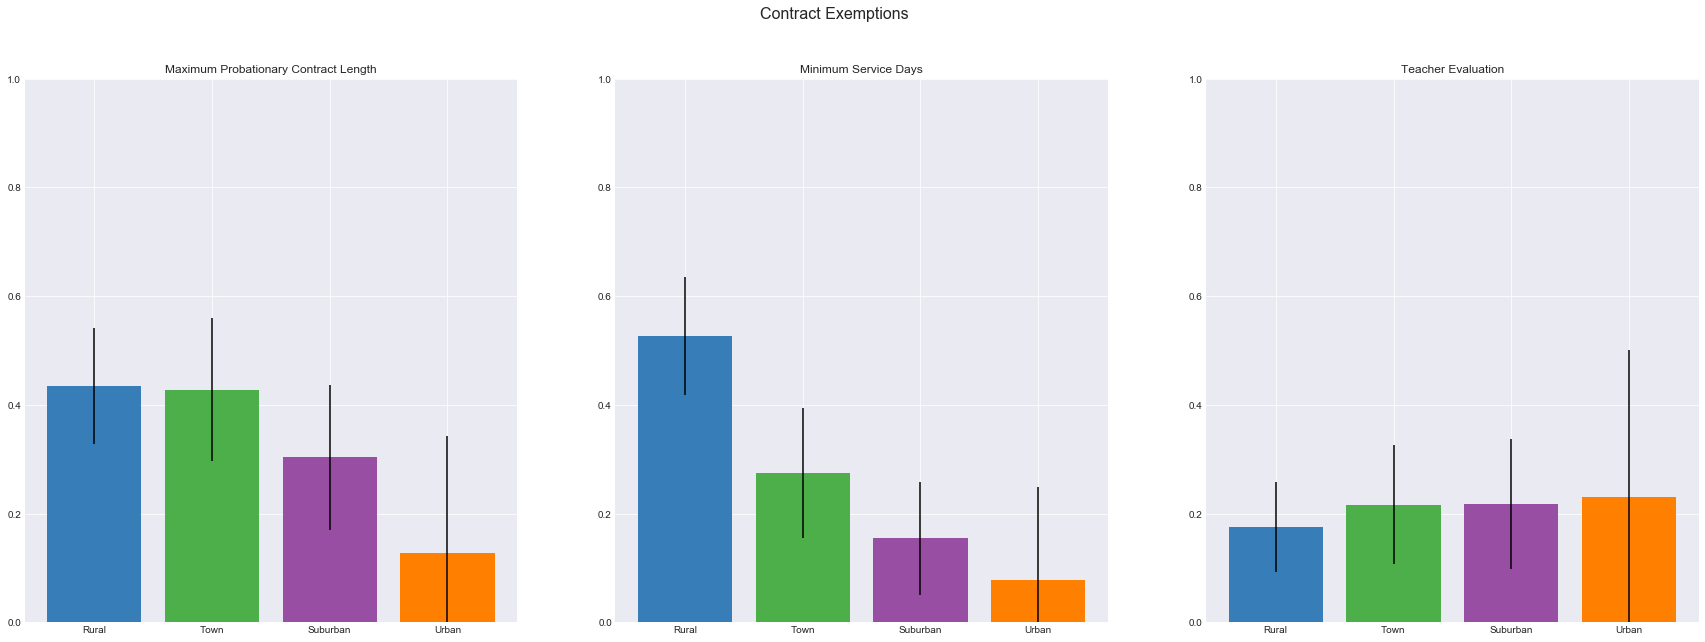

In [14]:

f, ((ax1, ax2, ax3)) = plt.subplots(1, 3,  figsize = (10,10))
for ax, reg in zip([ax1, ax2, ax3], range(0, 3)):
    bar_df = graphs.create_bar_df(data = data, group_var = 'geography', x_var = contracts[reg], group_order_dict = geo_order)
    ax.bar(bar_df['geography'], bar_df['reg_mean'], yerr= bar_df['se'] * 1.98 * 2 ,color=palette(bar_df['order']))
    ax.set_ylim(0,1)
    ax.set_title(regulations.labels_short[contracts[reg]])
    ax.set_aspect('auto')
f.suptitle('Contract Exemptions', fontsize=16)

f.savefig(table_path + 'Geography X Contracts', dpi = 600)

#from IPython.display import Image
#Image(table_path + 'Geography X Class Sizes.png')
